<a href="https://colab.research.google.com/github/pcsilcan/dm/blob/master/20202/dm_20202_0501_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
repo='https://raw.githubusercontent.com/pcsilcan/dm/master/20202/data/'
irisfile='iris.csv'
url='%s%s'%(repo, irisfile)

In [3]:
df = pd.read_csv(url).sample(frac=1)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
21,5.1,3.7,1.5,0.4,Setosa
76,6.8,2.8,4.8,1.4,Versicolor
88,5.6,3.0,4.1,1.3,Versicolor
0,5.1,3.5,1.4,0.2,Setosa
62,6.0,2.2,4.0,1.0,Versicolor


In [4]:
x_train = df.iloc[:120, :-1].to_numpy()
y_train = pd.get_dummies(df.iloc[:120, -1]).to_numpy()

x_test = df.iloc[120:, :-1].to_numpy()
y_test = pd.get_dummies(df.iloc[120:, -1]).to_numpy()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


## Defining the ANN with Keras

In [5]:
model = Sequential([Dense(8, input_dim=4, activation='relu'),
                    Dense(18,activation='relu'),
                    Dense(25,activation='relu'),
                    Dense(30,activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(3, activation='softmax')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=2)

In [7]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9667


[0.06465698033571243, 0.9666666388511658]

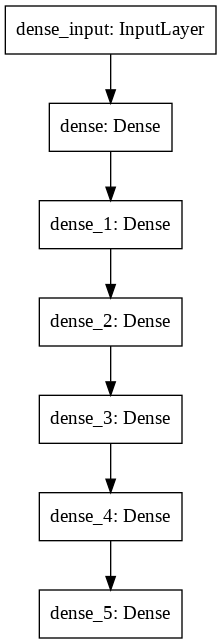

In [8]:
keras.utils.plot_model(model)

In [9]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


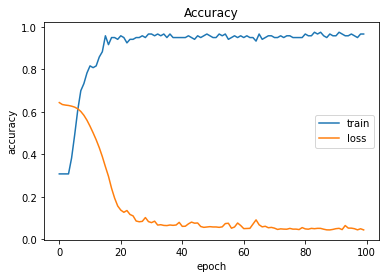

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='center right')
plt.show()